In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
# duplicate cheakout
df.duplicated().sum()

np.int64(172)

In [5]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [6]:
df.dropna(inplace=True)   # i am delete all those rows that containing missing value

In [7]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [8]:
female = df[df['Gender'] == 'Female']
male = df[df['Gender'] == 'Male']

In [9]:
female.shape , male.shape

((52576, 12), (51018, 12))

In [10]:
female['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    30107
satisfied                  22469
Name: count, dtype: int64

In [11]:
male['Type of Travel'].value_counts()

Type of Travel
Business travel    35032
Personal Travel    15986
Name: count, dtype: int64

In [12]:
male['Class'].value_counts()

Class
Business    24665
Eco         22817
Eco Plus     3536
Name: count, dtype: int64

In [13]:
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [14]:
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

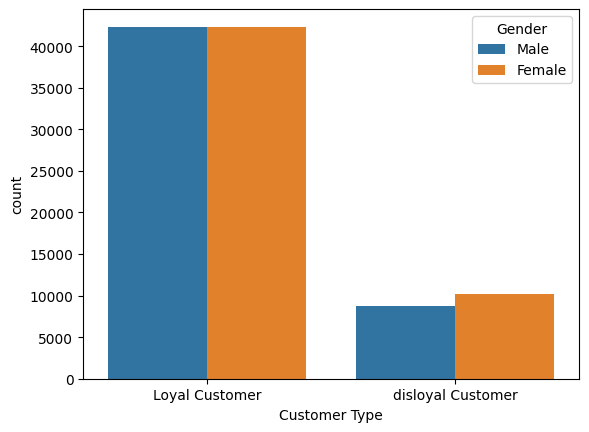

In [15]:
sns.countplot(x="Customer Type",data=df,hue='Gender')
plt.show()

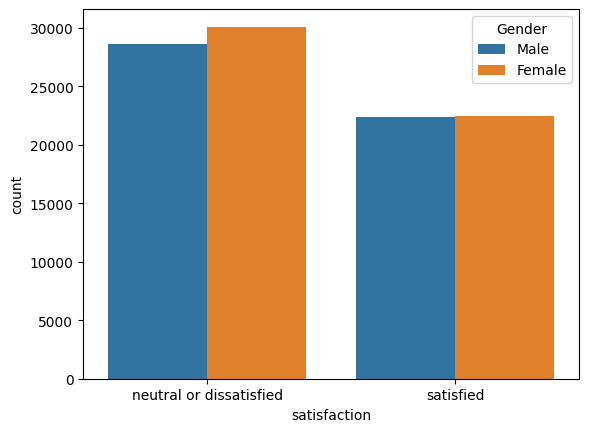

In [16]:
sns.countplot(x="satisfaction",data=df,hue='Gender')
plt.show()

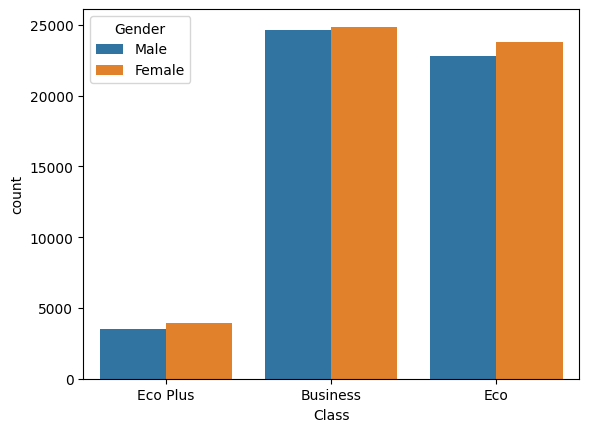

In [17]:
sns.countplot(x="Class",data=df,hue='Gender')
plt.show()

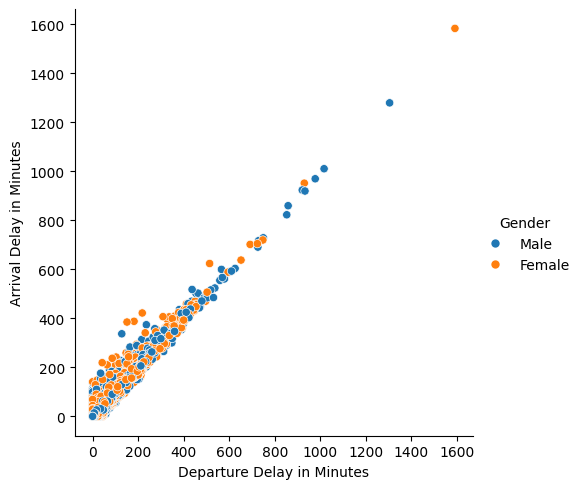

In [18]:
sns.relplot(x="Departure Delay in Minutes",y= "Arrival Delay in Minutes",data=df,hue='Gender')
plt.show()

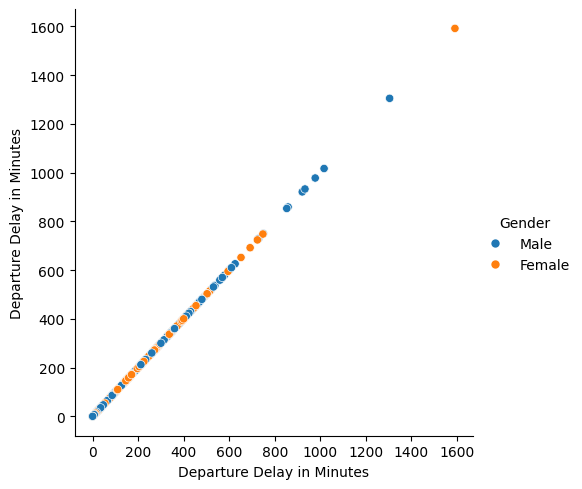

In [19]:
sns.relplot(x='Departure Delay in Minutes',y='Departure Delay in Minutes',data=df,hue ='Gender')
plt.show()

In [20]:
df['Age'].max()

np.int64(85)

In [21]:
df['Age'].min()

np.int64(7)

<Axes: xlabel='Age', ylabel='Count'>

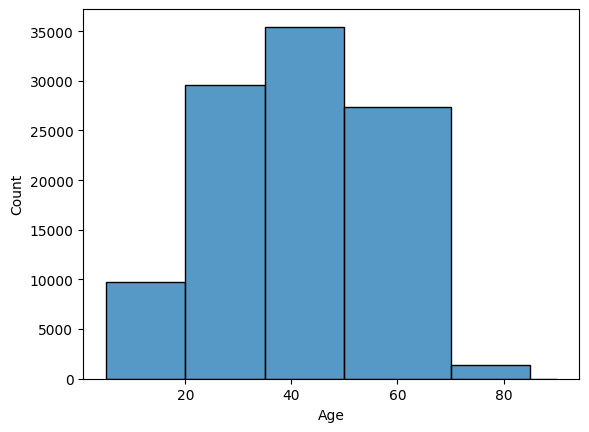

In [22]:
sns.histplot(df['Age'],bins =[5,20,35,50,70,85,90])

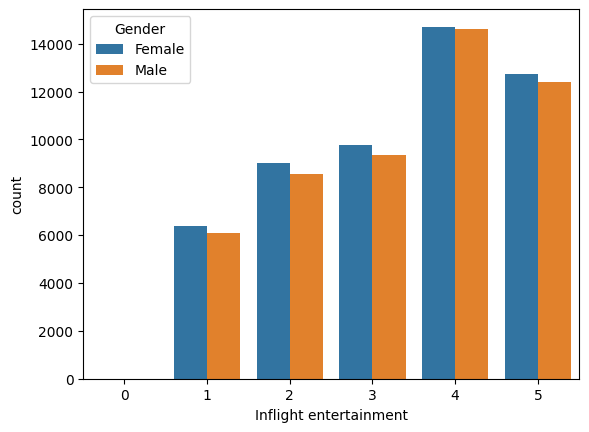

In [23]:
sns.countplot(x="Inflight entertainment",data=df,hue='Gender')
plt.show()

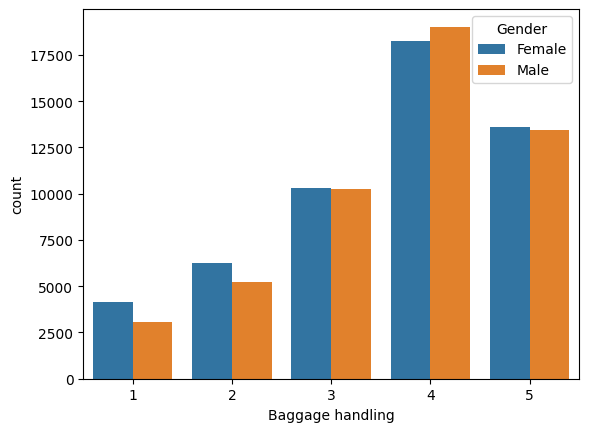

In [24]:
sns.countplot(x="Baggage handling",data=df,hue='Gender')
plt.show()

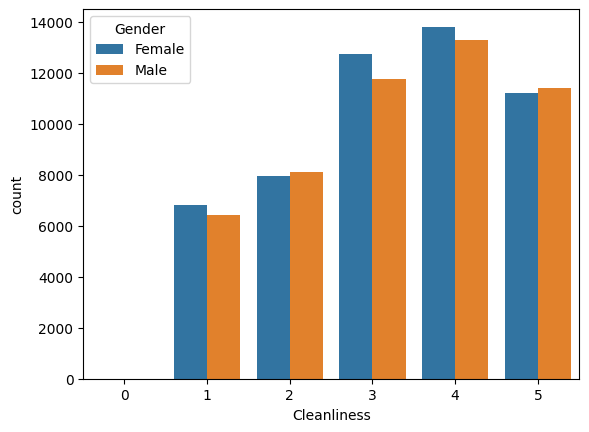

In [25]:
sns.countplot(x="Cleanliness",data=df,hue='Gender')
plt.show()

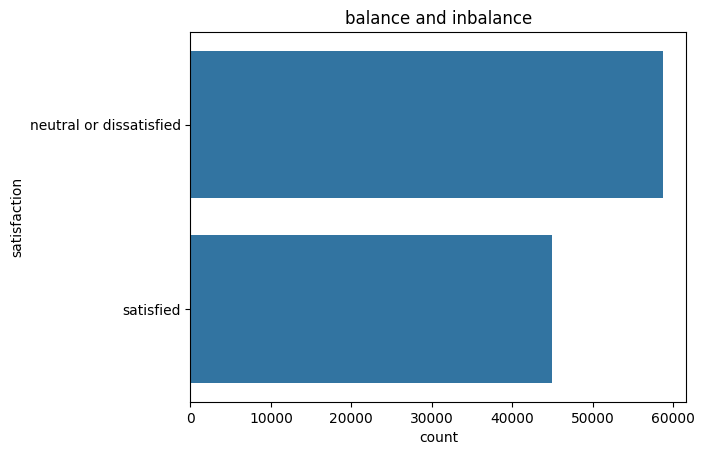

In [26]:
### data balance and inbalance
sns.countplot(df['satisfaction'])
plt.title("balance and inbalance")
plt.show()

In [27]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [28]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [29]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder 

In [30]:
#from sklearn.preprocessing import LabelEncoder,onehotEncoder,originalEncoder

In [31]:
# onehot encoding 
df2 = pd.get_dummies(df,drop_first="if_binary").astype(int) 

In [32]:
df2.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1


In [33]:
df2.isnull().sum() 

Age                                0
Flight Distance                    0
Inflight entertainment             0
Baggage handling                   0
Cleanliness                        0
Departure Delay in Minutes         0
Arrival Delay in Minutes           0
Gender_Male                        0
Customer Type_disloyal Customer    0
Type of Travel_Personal Travel     0
Class_Eco                          0
Class_Eco Plus                     0
satisfaction_satisfied             0
dtype: int64

In [34]:

# x and y split , independent and dependent variable 
x = df2.drop("satisfaction_satisfied",axis='columns')  # independent variabls 
y = df2[['satisfaction_satisfied']]  # target variable 

In [35]:
# training and testing split  
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [36]:
from sklearn.linear_model import LogisticRegression 

In [37]:
lgr = LogisticRegression()

In [38]:
y_train.values.ravel()

array([0, 1, 0, ..., 1, 0, 0])

In [39]:
import warnings 
warnings.filterwarnings('ignore')

In [40]:
## train the algorithm 
lgr.fit(x_train,y_train) 

LogisticRegression()

In [41]:
print("Training score : ",lgr.score(x_train,y_train)*100) 
print("Testing score : ",lgr.score(x_test,y_test)*100 )

Training score :  79.73453996983409
Testing score :  79.46329456054829


In [42]:
pred = lgr.predict(x_test)

In [43]:
x_test.shape 

(20719, 12)

In [44]:
pred 

array([1, 1, 0, ..., 1, 1, 1])

In [45]:
y_test['prediction'] =   pred # actual 

In [46]:
y_test.head(40)

,satisfaction_satisfied,prediction
55999,1,1
3322,1,1
96361,0,0
71602,0,0
43695,0,1
51627,0,0
32530,1,1
49270,0,0
3939,1,1
33251,1,1


In [47]:
## model evaluation  

from sklearn.metrics import confusion_matrix,classification_report

In [48]:
# confusion_matrix(actual,prediction)  
matrix = confusion_matrix(y_test['satisfaction_satisfied'],y_test['prediction'])  
matrix 

array([[9634, 2222],
       [2033, 6830]])

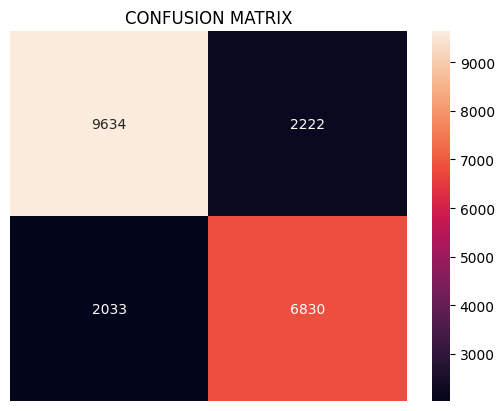

In [49]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.heatmap(matrix,annot=True,fmt='d')    # d ==> decimal 
plt.title('CONFUSION MATRIX')
plt.axis('off')
plt.show()

In [50]:
import os, joblib 
os.makedirs('models',exist_ok=True) 
joblib.dump(lgr,'./models/logisticregre.lb') 
print('your model is saved!')

your model is saved!


In [51]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     11856
           1       0.75      0.77      0.76      8863

    accuracy                           0.79     20719
   macro avg       0.79      0.79      0.79     20719
weighted avg       0.80      0.79      0.79     20719

